# VisNet Tutorial Oct 19

## <span style="color:dodgerblue"> Dependencies </span>

- Numpy 1.2+
- Pandas 1.4.3+
- NetworkX 2.8.2+
- Matplotlib 3.5.2+
- WNTR 0.3.1+
- Imageio 2.19.3+

## <span style="color:dodgerblue"> Import Libraries </span>

In [1]:
import viswaternet as vis

import matplotlib.pyplot as plt
import os

## <span style="color:dodgerblue"> Run Network EPANET simulation, and store necessary information about network into a dataframe </span>

Notes:
- When initializing the model, WNTR is used to obtain the network coordinates, necessary information about the network such as pipe names, junction names, etc. Additionally, a hydraulic simulation of the network is done using the defined parameters from the .inp file. The simulator used is EPANET 2.2.0 

In [2]:
#Initialize model
model = vis.VisWNModel('Networks\CTown.inp')

D:\Applications\Anaconda3\envs\WaterQuality\lib\site-packages\wntr\epanet\io.py:2192: UserWarning: Not all curves were used in "D:\Class Projects\wdn-viz\Examples\Networks\CTown.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


***

# 1. Basic Plotting
This example demonstrates the basic plotting fuctionality that the function `plot_basic_elements` provides, without any additional data attached to each element of the network. 

## <span style="color:dodgerblue"> plot_basic_elements() </span>
Description: Plotting function that creates a barebones plot of the network without any data attached to them.

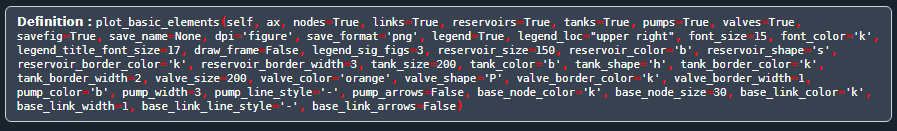

Notes:

- When no optional arguments are given to the function, it creates a barebones plot of the network, similar to one seen in EPANET.


- The marker styles used are the default ones used throughout all functions. Reservoirs are black squares, tanks are black diamonds, pipes are black edges, pumps are blue edges, and valves are represented by orange '+' markers shown at the center point of the valve edge.

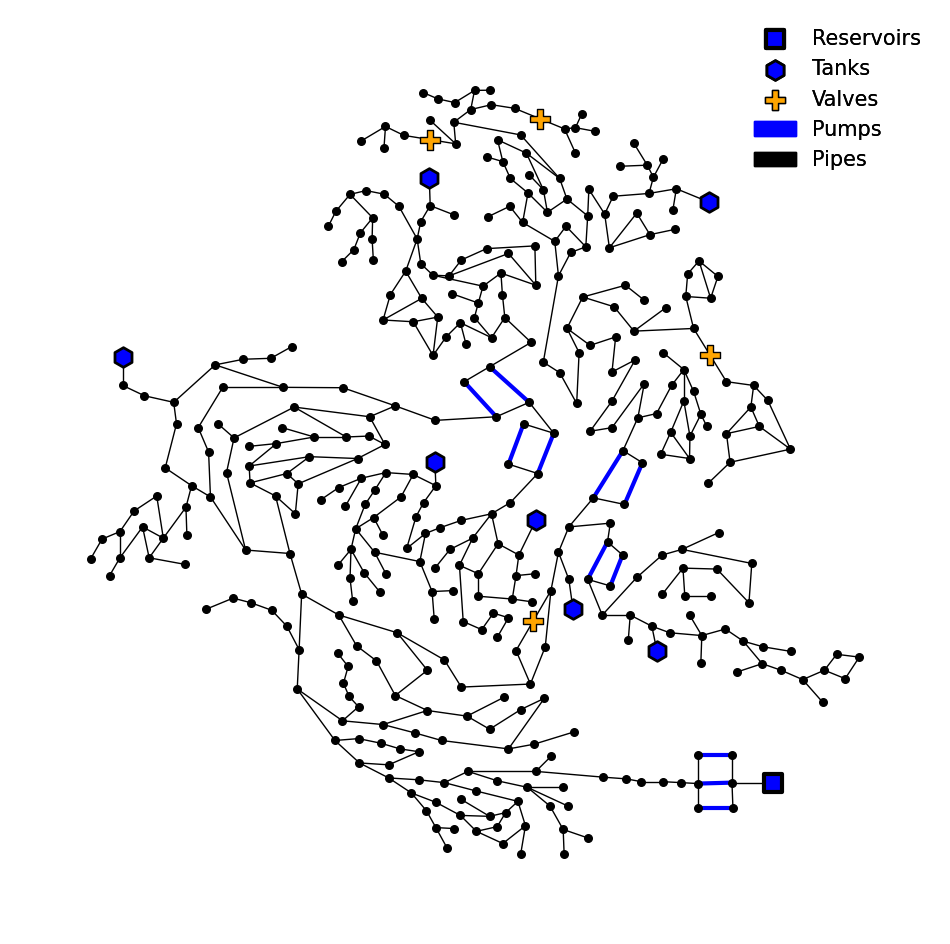

In [3]:
# Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (12,12))

#Removes border from figure
plt.box(False)

# Creates plot of network with basic elements.
model.plot_basic_elements(ax)

***

# 2. Plotting Continuous Features

Display node and link data that can be described as continuous (that can be represented using a colorbar).

## <span style="color:dodgerblue"> plot_continuous_nodes() </span>
Description: Plotting function that gets and draws continuous node data.

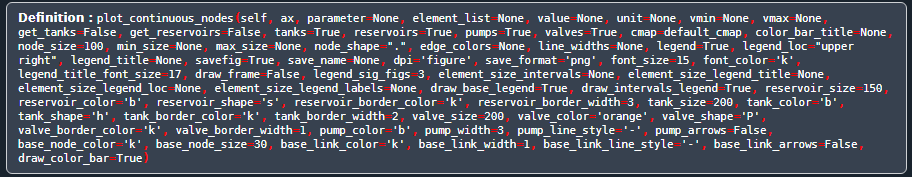

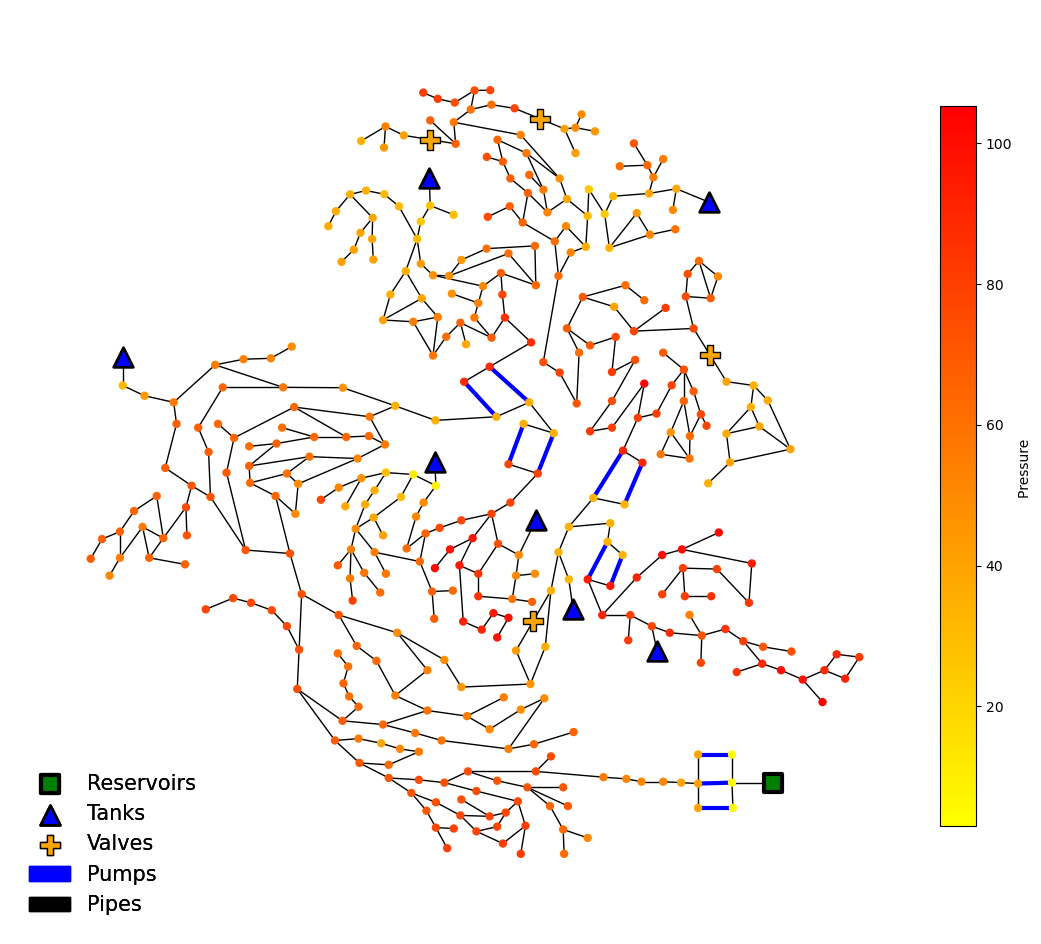

In [4]:
# Plot nodal elevation.

fig, ax = plt.subplots(figsize = (12,12))
plt.box(False)

model.plot_continuous_nodes(ax, 
                              parameter='pressure', 
                              value = 'max',
                              color_bar_title='Pressure ',
                              legend_loc = 'lower left',
                              reservoir_color = 'g',
                              tank_shape = '^')
plt.show()

## <span style="color:dodgerblue"> plot_continuous_links() </span>
Description: Plotting function that gets and draws continuous link data.

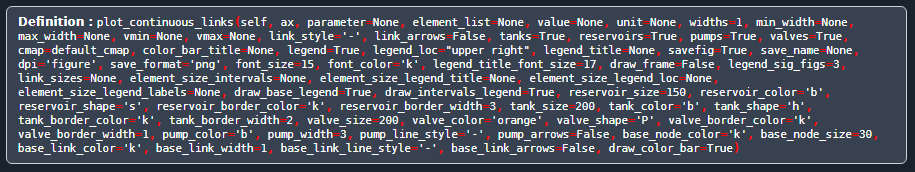

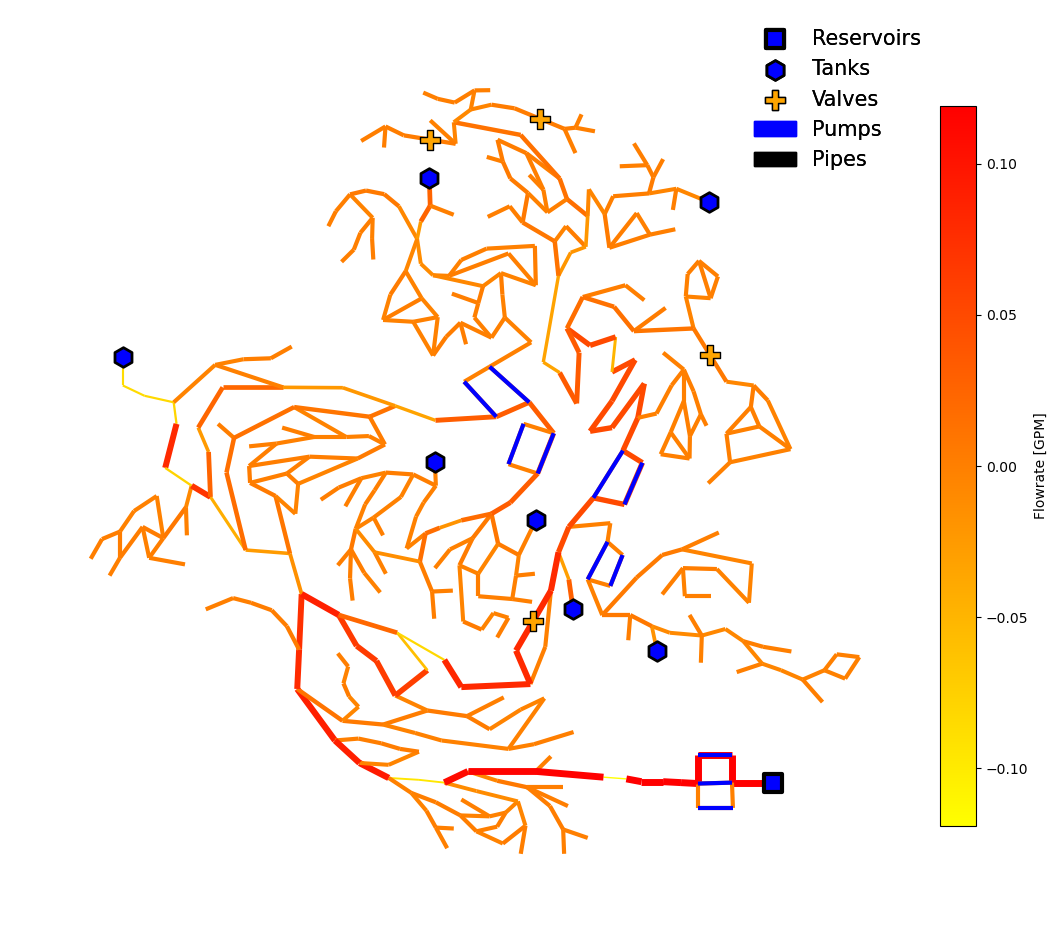

In [5]:
# Plot mean link flow rates over the simulation duration.

fig, ax = plt.subplots(figsize = (12,12))
plt.box(False)

model.plot_continuous_links(ax, 
                              parameter='flowrate',
                              value=20,
                              min_width = 1,
                             max_width = 5,
                             color_bar_title='Flowrate [GPM]')
                             #cmap = 'bwr', #coolwarm
                             #unit = 'GPM')
plt.show()

***

# 3. Plotting Discrete Features

These functions allow the user to discretize node/link data that can be described as continuous (that can be represented using a colorbar), sort this data into bins (thus converting the colorbar into a legend with distinct colors), and then plot the discretized data.

## <span style="color:dodgerblue"> plot_discrete_nodes() </span>
Description: Plotting function that gets and draws continuous node data.

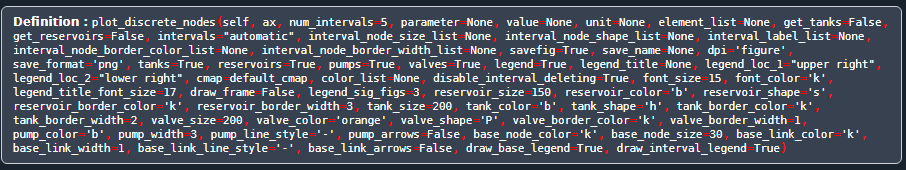

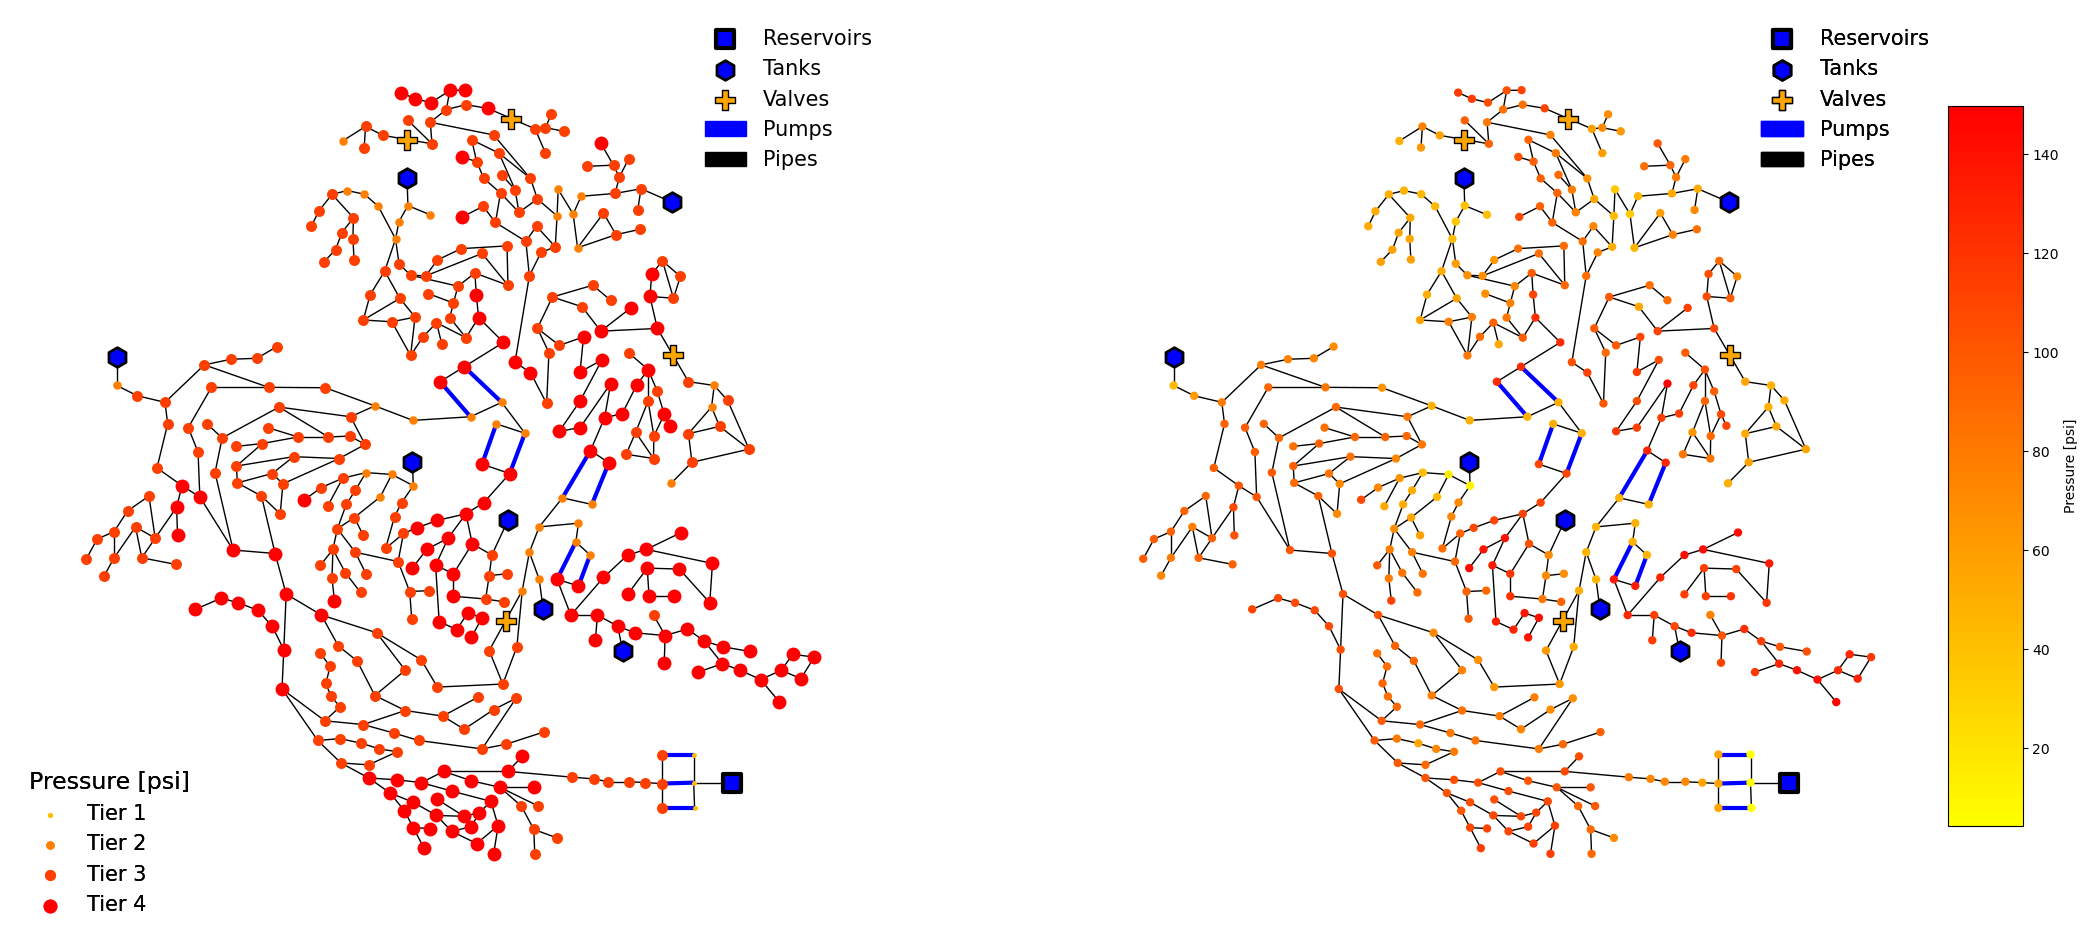

In [6]:
# Plot nodal pressure at hour 6.

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(25,12),sharex=True,sharey=True)

ax1.axis('off')
model.plot_discrete_nodes(ax1, 
                            parameter = 'pressure', 
                            value = 'max',
                            legend_loc_2 = 'lower left',
                            intervals = [0, 10, 50, 100, 150],
                            num_intervals = 6,
                            interval_label_list = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'],
                            interval_node_size_list = [50, 150, 250, 400],
                            unit = 'psi',
                           legend_title= 'Pressure [psi]')

ax2.axis('off')
model.plot_continuous_nodes(ax2,
                              parameter='pressure',
                              value = 'max',
                              color_bar_title = 'Pressure [psi]',
                              unit = 'psi')

## <span style="color:dodgerblue"> plot_discrete_links() </span>
Description: Plotting function that gets and draws continuous link data.

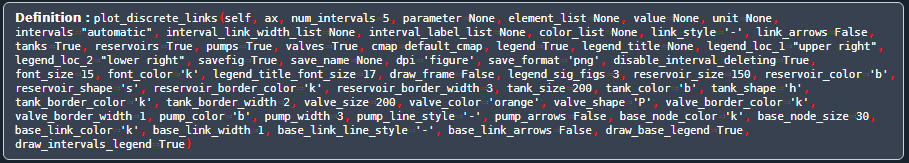

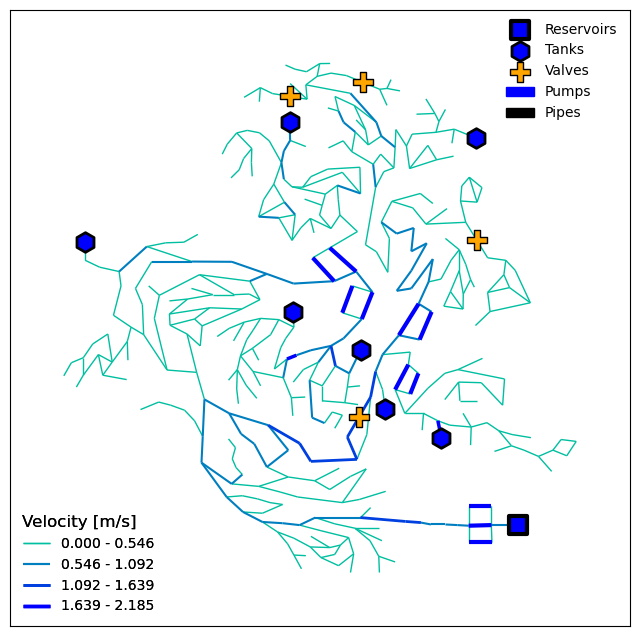

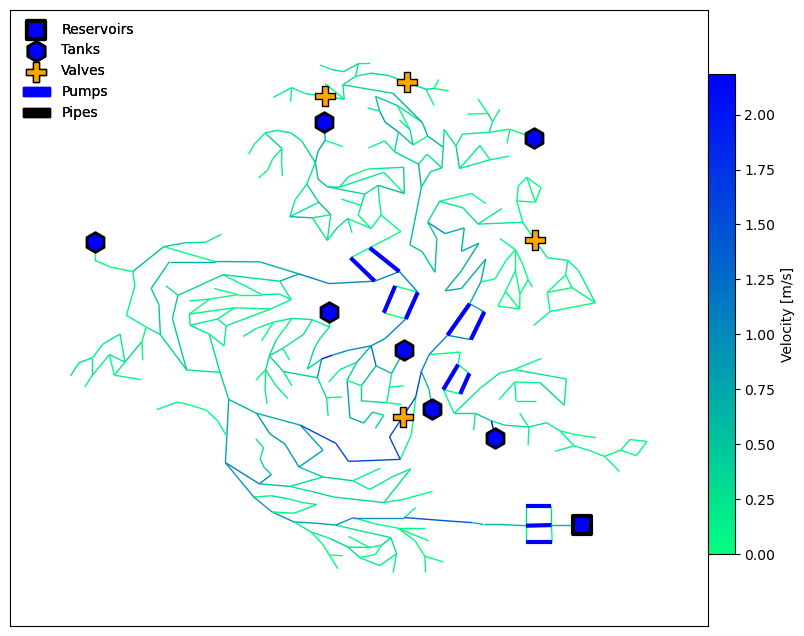

In [7]:
# Plot nodal pressure at hour 6.

fig, ax = plt.subplots(figsize = (8,8))

model.plot_discrete_links(ax,
                          parameter='velocity', 
                          value = 10, 
                          interval_link_width_list = [1,1.5,2,2.5],
                          legend_loc_2 = 'lower left', font_size = 10,
                          legend_title = 'Velocity [m/s]', legend_title_font_size = 12,
                          cmap = 'winter_r')

fig2, ax2 = plt.subplots(figsize = (9,8))

model.plot_continuous_links(ax2,
                            parameter='velocity', 
                            value = 10,
                            color_bar_title = 'Velocity [m/s]', legend_loc = 'upper left',
                            font_size = 10, legend_title_font_size = 12,
                            cmap = 'winter_r')

***

# 4. Plotting Unique Data


## <span style="color:dodgerblue"> plot_unique_data()</span>
Description: Plotting function for categorical data, as well as excel data and custom data generated by the user.

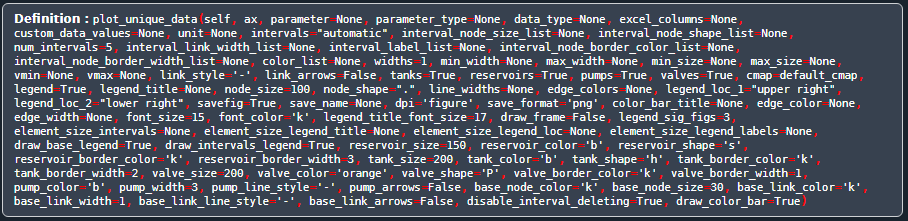

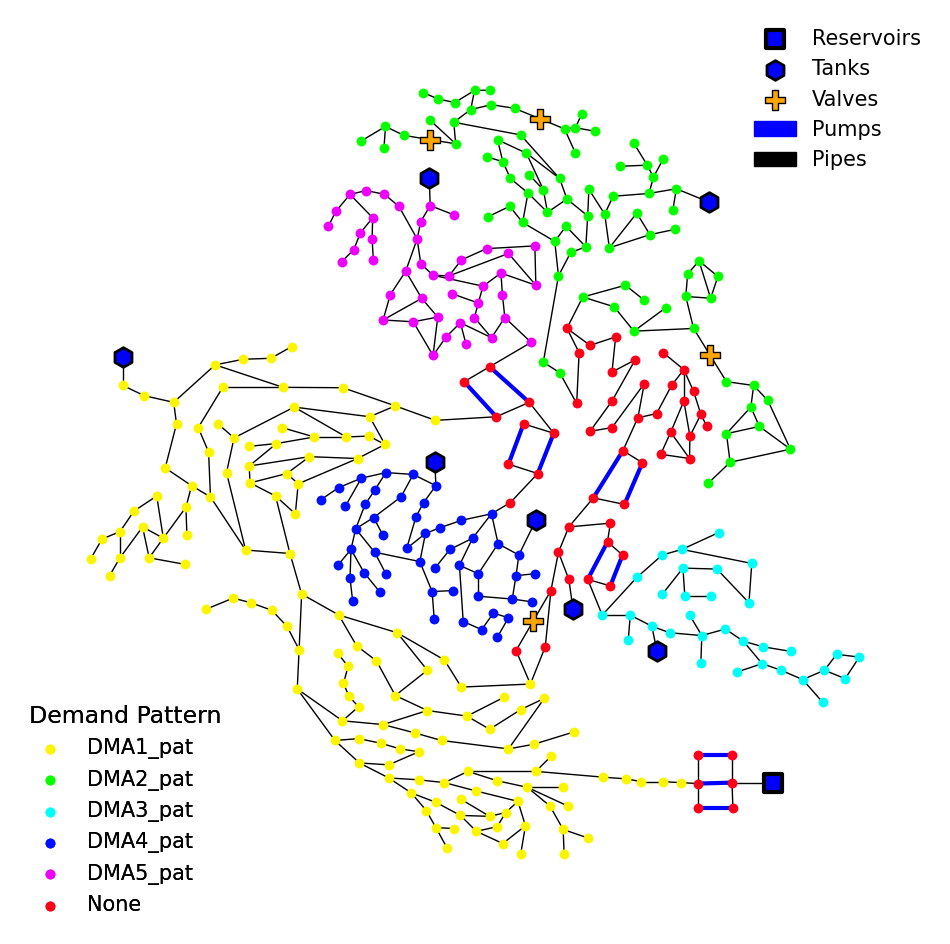

In [8]:
# Plot nodal demand patterns

fig, ax = plt.subplots(figsize=(12,12))
plt.box(False)

model.plot_unique_data(ax, 
                         parameter='demand_patterns', 
                         cmap = 'hsv', legend_loc_2 = 'lower left',
                         legend_title = 'Demand Pattern')

# Plot pipe diameters

fig, ax = plt.subplots(figsize=(12,12))
plt.box(False)

visplot.plot_unique_data(model, ax, 
                         parameter='diameter', 
                         unit = 'in', font_size = 10,
                         legend_loc_2 = 'lower left',
                         bin_width_list = [0.5 *float(x) for x in list(range(1,18))], 
                         cmap = 'Blues',
                         pump_color = 'r',
                         legend_title = 'Pipe diameter [in]', legend_title_font_size = 12)

D:\Applications\Anaconda3\envs\WaterQuality\lib\site-packages\wntr\epanet\io.py:2192: UserWarning: Not all curves were used in "Networks\CTown.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


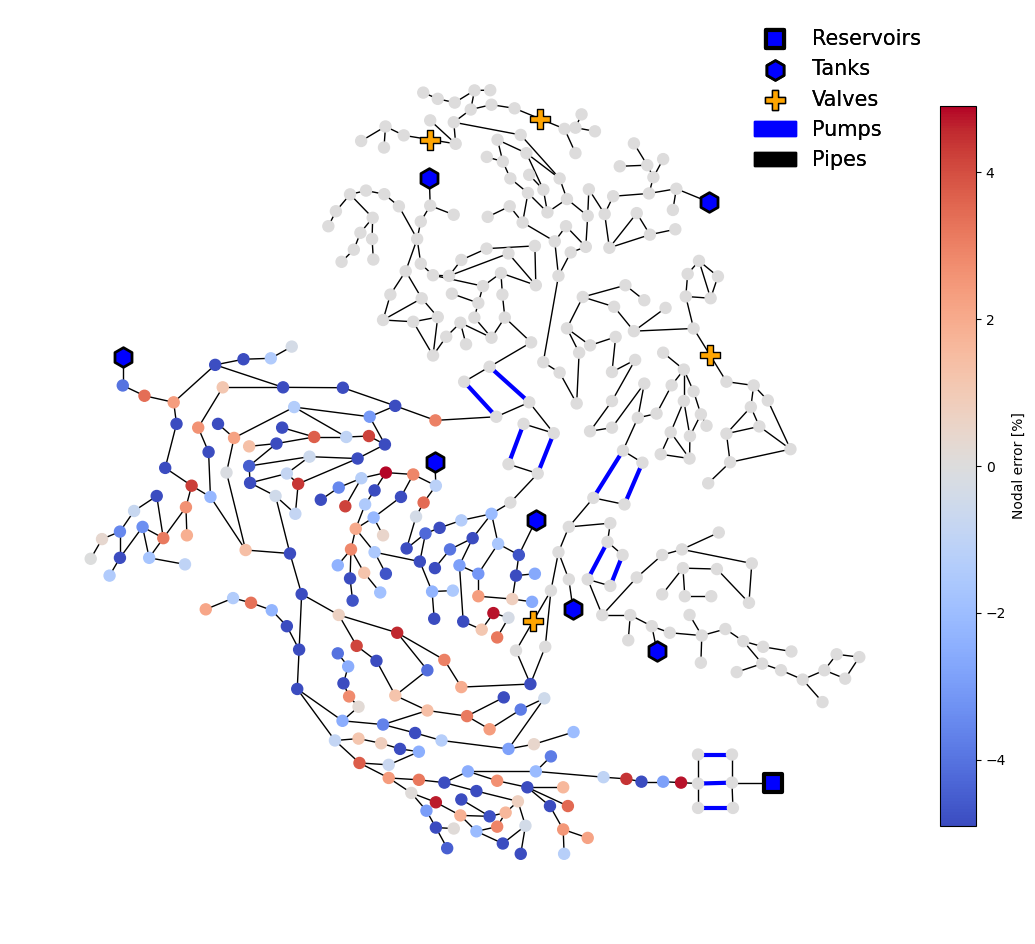

In [9]:
# Plot custom numerical data 

# Generate random data
import random
import wntr 

wn = wntr.network.WaterNetworkModel('Networks\CTown.inp')
data = []
index = []
   
random.seed(1)
for junc_name, junc in wn.junctions():
    index.append(junc_name)
    try:
        pat = junc.demand_timeseries_list[0].pattern.name
        if pat == 'DMA2_pat' or pat == 'DMA5_pat' or pat == 'DMA3_pat':
            data.append(0)
        else:
            data.append(random.uniform(-8,5))
    except AttributeError:
        data.append(0)
    
fig, ax = plt.subplots(figsize=(12,12))
plt.box(False)

model.plot_unique_data(ax, parameter='custom_data',
                     data_type='continuous',
                     parameter_type='node',
                     cmap = 'coolwarm',
                     node_size = 250,
                     custom_data_values=[index,data],
                     color_bar_title = 'Nodal error [%]')


***

# 5. A Couple of Other Features ...

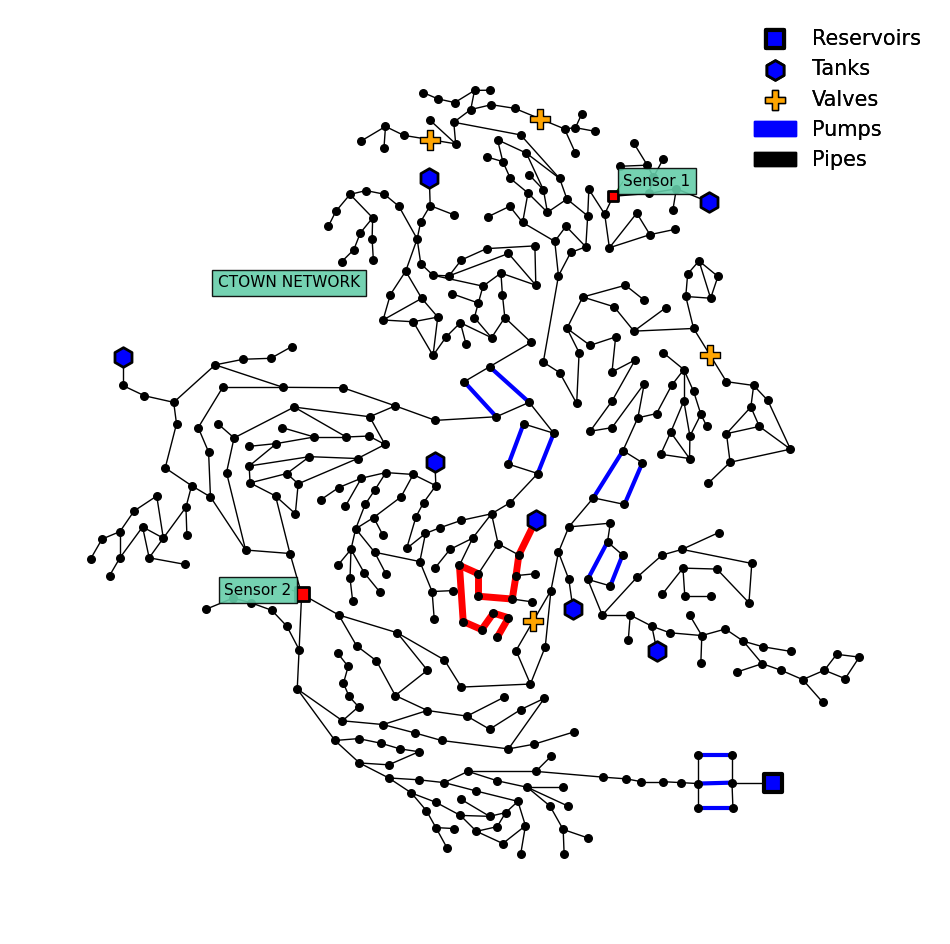

In [10]:
# Labeling and highlighting nodes and links

fig, ax = plt.subplots(figsize=(12,12))
plt.box(False)
model.plot_basic_elements(ax,)

# Draws label by providing list of nodes. 
# This means that coordiantes are relative to the node position, and the values you input will depend on the network extent.
model.draw_label(ax,
               labels = ['Sensor 1','Sensor 2'],
               x_coords = [50,-50],
               y_coords = [75,20],
               nodes = ['J511','J411'])

# Add text to figure 
# If "nodes" are not provides,the coordinates provided ([x,y]) are absolute from 0 to 1 (based on network extent). 
model.draw_label(ax, 
               labels = ['CTOWN NETWORK'],
               x_coords = [0.3],
               y_coords = [0.7])

# Highlight certain nodes 
model.draw_nodes(ax,['J511','J411'],
               node_size=[50,100],
               node_color='r',
               node_shape='s',
               edge_colors='k',
               line_widths=2)

# Highlight certain links
model.draw_links(ax,
                   link_list = ['P986','P987','P988', 'P144', 'P984', 'P982', 'P981', 'P161', 'P978', 'P976', 'P249'],
                   edge_color='r',
                   widths= [5] * 11)

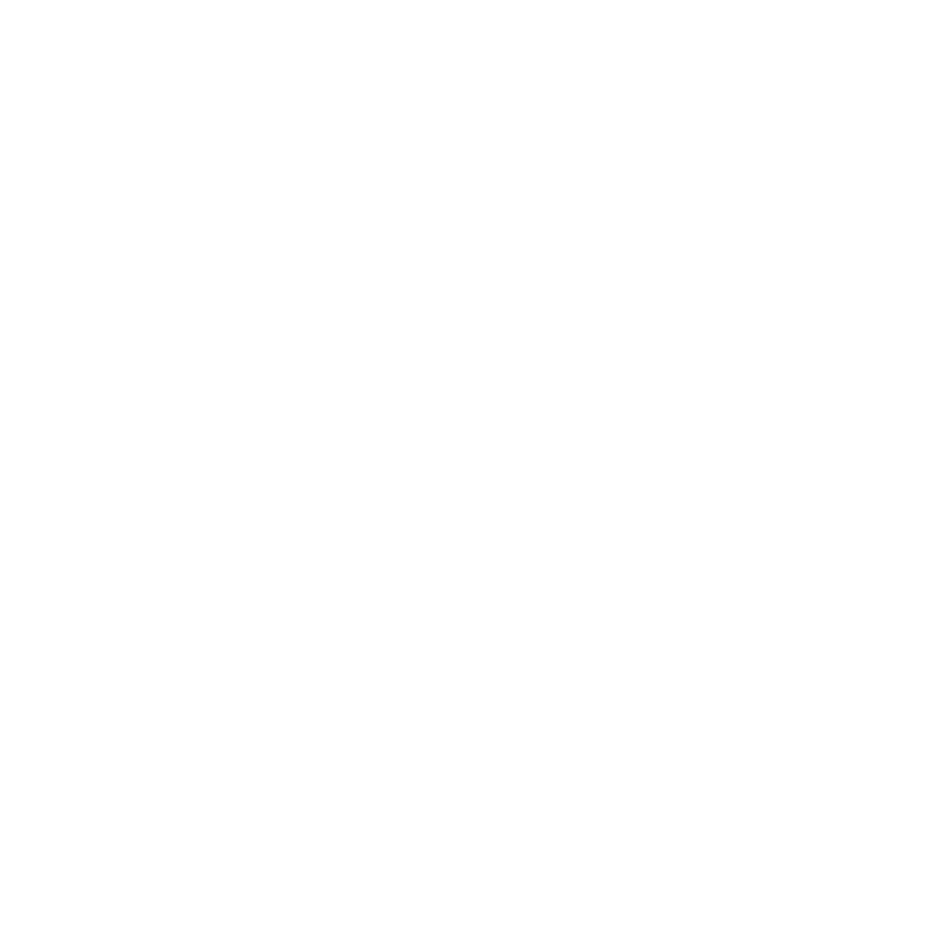

In [11]:
# Create a gif to show the variation of pressure over time 
#(this will not show up in the Jupyter notebook -- look in the Images folder!)

fig, ax = plt.subplots(figsize=(12,12))
plt.box(False)
model.animate_plot(ax,
                     parameter = 'pressure',
                     parameter_type = 'node',
                     data_type = 'discrete',
                     function = model.plot_discrete_nodes,
                     fps = 5,
                     first_timestep=0,last_timestep=30,
                     num_intervals=5,
                     intervals=[-0.0001,20,40,60,80],
                     legend_loc_2 = 'upper left',
                     gif_save_name='time_varying_pressure')